### Clustering Analysis

Dans le cadre du travail pour VLille, nous devions effectuer une analyse de regroupement sur les caractéristiques de l'ensemble de données relatives aux conditions météorologiques, puis comparer l'analyse à la caractéristique météorologique.

x

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('train_clust.csv', index_col='datetime')

In [6]:
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [7]:
weather_df = data[['season', 'temp', 'atemp', 'humidity','windspeed']]

In [8]:
weather_df

,season,temp,atemp,humidity,windspeed
datetime,,,,,
2011-01-01 00:00:00,1,9.84,14.395,81,0.0000
2011-01-01 01:00:00,1,9.02,13.635,80,0.0000
2011-01-01 02:00:00,1,9.02,13.635,80,0.0000
2011-01-01 03:00:00,1,9.84,14.395,75,0.0000
2011-01-01 04:00:00,1,9.84,14.395,75,0.0000
...,...,...,...,...,...
2012-12-19 19:00:00,4,15.58,19.695,50,26.0027
2012-12-19 20:00:00,4,14.76,17.425,57,15.0013
2012-12-19 21:00:00,4,13.94,15.910,61,15.0013


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_df)


In [10]:
weather_scaled

array([[-1.34986372, -1.33366069, -1.09273697,  0.99321305, -1.56775367],
       [-1.34986372, -1.43890721, -1.18242083,  0.94124921, -1.56775367],
       [-1.34986372, -1.43890721, -1.18242083,  0.94124921, -1.56775367],
       ...,
       [ 1.33801198, -0.80742813, -0.91395927, -0.04606385,  0.26970368],
       [ 1.33801198, -0.80742813, -0.73518157, -0.04606385, -0.83244247],
       [ 1.33801198, -0.91267464, -0.82486544,  0.21375537, -0.46560752]])

In [11]:
kmeans = KMeans(init='random', n_clusters=4, n_init=10)

In [12]:
kmeans.fit(weather_scaled)
clusters = kmeans.predict(weather_scaled)

In [13]:
weather_clustered = pd.DataFrame(weather_scaled, columns=weather_df.columns, index=weather_df.index)
weather_clustered['cluster'] = clusters

weather_clustered

,season,temp,atemp,humidity,windspeed,cluster
datetime,,,,,,
2011-01-01 00:00:00,-1.349864,-1.333661,-1.092737,0.993213,-1.567754,2
2011-01-01 01:00:00,-1.349864,-1.438907,-1.182421,0.941249,-1.567754,2
2011-01-01 02:00:00,-1.349864,-1.438907,-1.182421,0.941249,-1.567754,2
2011-01-01 03:00:00,-1.349864,-1.333661,-1.092737,0.681430,-1.567754,2
2011-01-01 04:00:00,-1.349864,-1.333661,-1.092737,0.681430,-1.567754,2
...,...,...,...,...,...,...
2012-12-19 19:00:00,1.338012,-0.596935,-0.467310,-0.617666,1.617227,3
2012-12-19 20:00:00,1.338012,-0.702182,-0.735182,-0.253919,0.269704,3
2012-12-19 21:00:00,1.338012,-0.807428,-0.913959,-0.046064,0.269704,3


In [14]:
kmeans_tests = [KMeans(init='random', n_clusters = i, n_init = 10) for i in range(1,10)]
score = [kmeans_tests[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans_tests))]

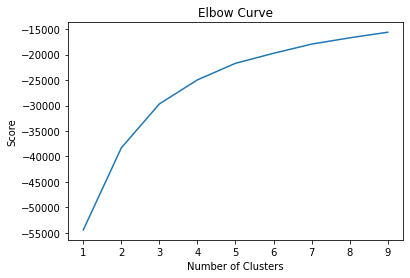

In [15]:
plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

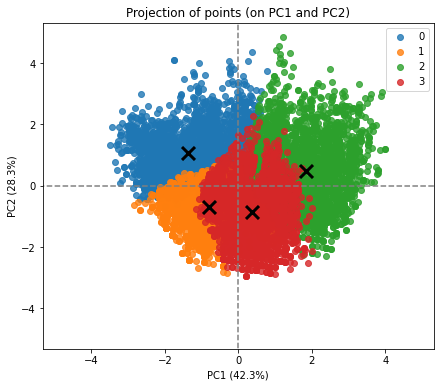

In [16]:
from sklearn.decomposition import PCA
from functions import *
pca = PCA(n_components=2)
pca.fit(weather_scaled)

weather_reduced = pca.transform(weather_scaled)

weather_reducesdf = pd.DataFrame(weather_reduced, index = weather_df.index, columns=['PC1', 'PC2'])

weather_reducesdf['cluster'] = clusters
centres_reduced = pca.transform(kmeans.cluster_centers_)

display_factorial_planes(weather_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)

plt.scatter(centres_reduced[:, 0], centres_reduced[:,1], marker='x', s=169, linewidths=3, color='k', zorder=10)

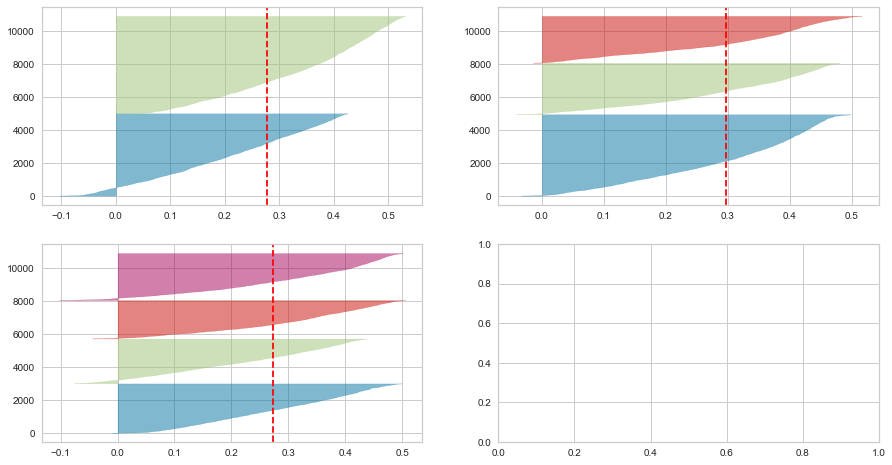

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2,3,4]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(init='random', n_clusters=i, n_init=10)
    q, mod = divmod(i, 2)
    
    '''
    Create SilhouetteVisualizer instance with KMeans instance,
    fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(weather_scaled)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [19]:
preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ('pca', PCA(n_components=2, random_state=42))
    ]
)

In [20]:
clusterer = Pipeline(
    [
        (
            "kmeans",
        KMeans(
            n_clusters=4,
            init = "random",
            n_init = 50,
            max_iter = 500,
            random_state = 42
        ),
        )
    ]
)

In [21]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ('clusterer', clusterer)
    ]
)


In [22]:
pipe.fit(weather_df)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(init='random', max_iter=500,
                                         n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [23]:
preprocessed_data = pipe["preprocessor"].transform(weather_df)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels
                 )

0.3367570235383926

In [24]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(data['weather'])

In [25]:
true_labels

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
adjusted_rand_score(true_labels, predicted_labels)

0.006987601670273493

/home/ifeoluwaa/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


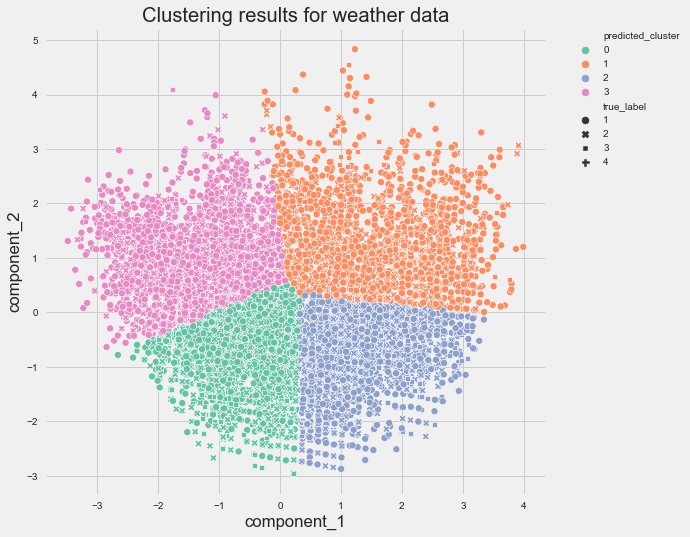

In [27]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(weather_df),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
"component_1",
        "component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        style="true_label",
        palette="Set2",
    )
   
scat.set_title(
        "Clustering results for weather data"
    )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
   
plt.show()

In [28]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 6):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(weather_df)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(weather_df),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

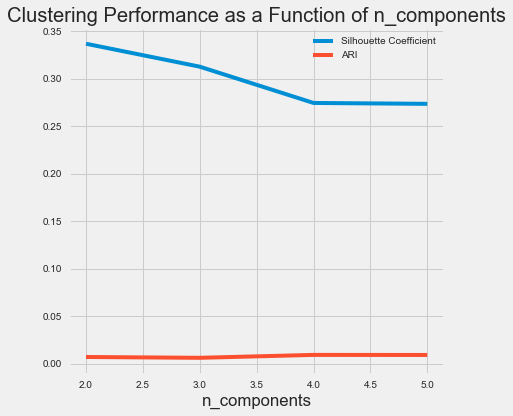

In [29]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
   range(2, 6),
   silhouette_scores,
   c="#008fd5",
   label="Silhouette Coefficient",
)
plt.plot(range(2, 6), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

In [30]:
ari_scores

[0.006987601670273493,
 0.006119656748622764,
 0.00918935829464746,
 0.009107865092736157]

In [31]:
silhouette_scores

[0.3367570235383926,
 0.3126083082465233,
 0.27442608047654077,
 0.27348451297223575]

In [32]:
clusters

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [33]:
weather_clustered[weather_clustered['cluster'] == 0]


,season,temp,atemp,humidity,windspeed,cluster
datetime,,,,,,
2011-02-14 11:00:00,-1.349864,0.139790,0.158707,-2.020690,0.514260,0
2011-02-14 12:00:00,-1.349864,0.350284,0.337485,-2.072654,2.107161,0
2011-02-14 13:00:00,-1.349864,0.455530,0.427168,-2.228545,1.617227,0
2011-02-14 14:00:00,-1.349864,0.560777,0.695040,-2.436401,2.473996,0
2011-02-14 15:00:00,-1.349864,0.350284,0.337485,-2.124618,3.821519,0
...,...,...,...,...,...,...
2012-11-12 14:00:00,1.338012,0.455530,0.427168,-0.098028,0.759638,0
2012-12-03 16:00:00,1.338012,0.560777,0.873818,-0.461775,-0.465608,0
2012-12-04 15:00:00,1.338012,0.560777,0.873818,-0.669630,0.514260,0


In [34]:
label = list(true_labels)

In [35]:
for i in range(0,5):
    print(i, label.count(i))

0 7192
1 2834
2 859
3 1
4 0


In [36]:
weather_clustered['cluster'].value_counts()

1    3044
2    2844
0    2672
3    2326
Name: cluster, dtype: int64

In [37]:
data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [38]:
data[data['weather'] == 4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164
